#Assesment 1 : Binary Classification from scratch using a single layer perceptron

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [9]:
dataset = pd.read_csv('/content/classification_Data.csv')
# dataset

**Visualise the data using scatter plot**


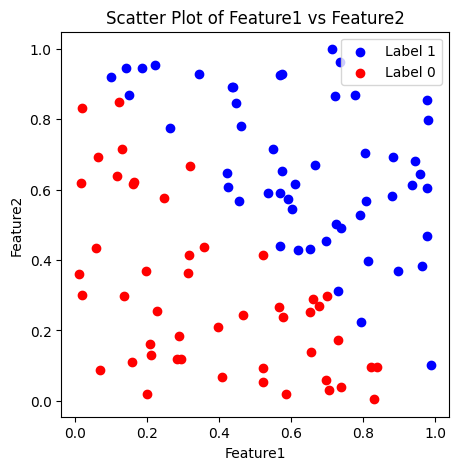

In [10]:
#Separating the data into positive and negative class based on "class"
positive_class = dataset[dataset['Class'] == 1]
negative_class = dataset[dataset['Class'] == 0]

#Scatter plot
plt.figure(figsize=(5,5))

plt.scatter(positive_class['Feature1'], positive_class['Feature2'], color='blue', label='Label 1')
plt.scatter(negative_class['Feature1'], negative_class['Feature2'], color='red', label='Label 0')

plt.title('Scatter Plot of Feature1 vs Feature2')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()

# plt.grid(True)
plt.show()

# Training and predicting the unseen data

Unit step activation function

$$
g(z) = \begin{cases}
1 & \text{if } z > 0 \\
0 & \text{otherwise}
\end{cases}
$$


**Training the perceptron model**

| y | y_pred | y - y_pred | Comments                                         |
|---|--------|------------|--------------------------------------------------|
| 1 | 1      | 0          | OK                                               |
| 1 | 0      | 1          | Prediction is low so we need to increase weight  |
| 0 | 0      | 0          | OK                                               |
| 0 | 1      | -1         | Prediction is high so we need to decrease weight |


Weights are pushed towards positive or negative target class in case of misclassification


**PERCEPTRON UPDATE RULE:**

W_new = W_old + (learning_rate * x_i * (y - y_pred))

B_new = B_old + (learning_rate * (y - y_pred))


In [11]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=1000):
      #Initializing the perceptron with a learning rate, number of iterations, and placeholders for weights and bias.
      self.learning_rate = learning_rate
      self.n_iters = n_iters
      self.weights = None
      self.bias = None

    def _step_function(self, x):
      return np.where(x > 0 , 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
          for idx,x_i in enumerate(X):
            # idx is the variable that will hold the index of the current element in the iteration.
              # x_i is the variable that will hold the current element (sample) from the iterable X.
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._step_function(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
      linear_output = np.dot(X, self.weights) + self.bias
      y_predicted = [self._step_function(x) for x in linear_output]
      return np.array(y_predicted)


# Calling the functions

In [12]:
# Prepare the data
X = dataset[['Feature1', 'Feature2']].values
y = dataset['Class'].values

# Initialize the Perceptron model
perceptron = Perceptron(learning_rate=0.1, n_iters=1000)

# Train the model
perceptron.fit(X, y)

# Make predictions
y_pred = perceptron.predict(X)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


Showing the decision boundary

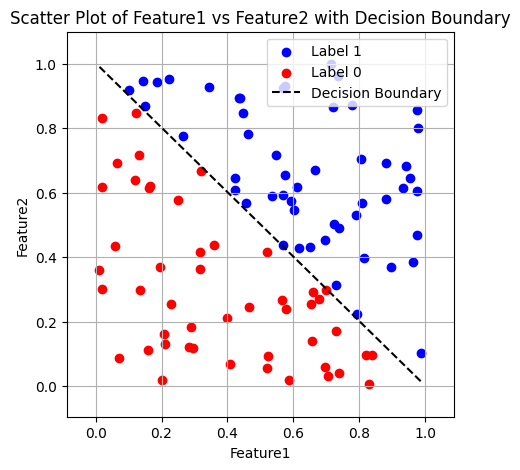

In [17]:
# Plotting the scatter plot with decision boundary
plt.figure(figsize=(5, 5))

# Scatter plot of the dataset
plt.scatter(positive_class['Feature1'], positive_class['Feature2'], color='blue', label='Label 1')
plt.scatter(negative_class['Feature1'], negative_class['Feature2'], color='red', label='Label 0')

# Plot the decision boundary
if perceptron.weights[1] != 0:
    slope = -perceptron.weights[0] / perceptron.weights[1]
    intercept = -perceptron.bias / perceptron.weights[1]
    x_values = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
    y_values = slope * x_values + intercept
    plt.plot(x_values, y_values, linestyle='--', color='black', label='Decision Boundary')

plt.title('Scatter Plot of Feature1 vs Feature2 with Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.grid(True)

# Adjust axis limits for better visibility
plt.xlim(np.min(X[:, 0]) - 0.1, np.max(X[:, 0]) + 0.1)
plt.ylim(np.min(X[:, 1]) - 0.1, np.max(X[:, 1]) + 0.1)

plt.show()